
<font color='blue'> 
#<center> **Deep Learning Foundation Project** <center>  </font>

<font color='brown'> 
###<center> **Prediction for Rainfall on specific day : Seattle city weather** </font>

<font color='Purple'> 
####<center> **Jigna Thacker | GCDAI | Apr 2019** <center>  </font>

<center> <img src="https://github.com/jmps967/INSAID-DLF_Jigna-Thacker/blob/master/Image/SeattleI5Skyline.jpg?raw=true" width="1020" height="720" /></center>




<font color='Orange'> 
##### *This notebook is created in Google Colab*  </font>

## Table of Content

1. [Background & Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Creation of ANN Model](#section4)<br>
5. [Conclusion](#section6)<br>


<a id='section1'></a>
## 1. Background & Problem Statement

- <u> Background </u>: - 
 __Seattle__ is a seaport city on the West Coast of the __United States__. City is famous for coffee, grunge and technology companies, one of the things that __Seattle__ is most famous for is, how often it __Rains__.

 </center>

 <img src="https://github.com/jmps967/INSAID-DLF_Jigna-Thacker/blob/master/Image/raining-on-the-streets-gty-mem-171019_16x9_992.jpg?raw=true" width="720" height="360" /> </center>


- <u>Problem Statement </u> :-
The data set to build a model able to predict whether it will rain on a specific day.This dataset is intended for binary classification tasks. 


<a id='section2'></a>
## 2. Data Loading and Description

**The dataset contains complete records of daily rainfall patterns from January 1st, 1948 to December 12th, 2017.**

<u> Variable Description </u>:-
- DATE        - Date of observations
- PRCP        - The amount of precipitation, in inches
- TMAX        - The maximum temperature for that day, in degrees Fahrenheit
- TMIN        - The minimum temperature for that day, in degrees Fahrenheit
- RAIN        - TRUE if rain was observed on that day, FALSE if it was not. 

##### [**RAIN** is **Target** variable here] #####


__Importing Packages__

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics

# allow plots to appear directly in the notebook
%matplotlib inline

import os


#### Importing the Dataset

**Fetching data from GitHub profile : https://github.com/jmps967/INSAID-DLF_Jigna-Thacker/blob/master/Data/seattle_weather.csv** 

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/jmps967/INSAID-DLF_Jigna-Thacker/master/Data/seattle_weather.csv')

In [ ]:
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


What are the **features**?
- DATE - Date of observations
- PRCP - The amount of precipitation, in inches
- TMAX - The maximum temperature for that day, in degrees Fahrenheit
- TMIN - The minimum temperature for that day, in degrees Fahrenheit


What is the **target**?
- RAIN - TRUE if rain was observed on that day, FALSE if it was not.

<a id='section3'></a>
## 3. Exploratory Data Analysis

In [ ]:
### Checking shape of the database

data.shape

(25551, 5)

In [ ]:
### Checking information about the database

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [ ]:
### Finding the unique values in the dataset

data.nunique()

DATE    25551
PRCP      207
TMAX       87
TMIN       68
RAIN        2
dtype: int64

In [ ]:
### First Finding the null values

data.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

**<u> Observation </u>:-**

There are total **25551** records, and **5** variables in the dataset.

There are null/missing information for below variables
- PRCP i.e.The amount of precipitation, in inches has **3** records
- RAINS i.e.rain was observed on that day(True/False) has **3** records



In [ ]:
### Short summary of the database

data.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


**Observation :-** 

There are missing values for record no. 18415, 18416 and 21067. 
Since our dataset is pretty huge consisting of almost 25000 entries, we can ignore the three missing entries by eliminating the rows containing the missing values.

In [ ]:
### copy original data in new data frame data1

data1=data

In [ ]:
print('Data Shape [Before]:', data1.shape)
data1.dropna(axis = 0, subset = ['PRCP', 'RAIN'], inplace = True)
print('Data Shape [After]:', data1.shape)

Data Shape [Before]: (25551, 5)
Data Shape [After]: (25548, 5)


**After Handling Null Data**

- Now that we have performed the operations, let's verify whether the null data has been eliminated or not.

In [ ]:
null_frame = pd.DataFrame(index = data1.columns.values)
null_frame['Null Frequency'] = data1.isnull().sum().values
percent = data1.isnull().sum().values/data1.shape[0]
null_frame['Missing %age'] = np.round(percent, decimals = 4) * 100
null_frame.transpose()

,DATE,PRCP,TMAX,TMIN,RAIN
Null Frequency,0.0,0.0,0.0,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,0.0


In [ ]:
### Short summary of the final cleaned database

data1.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25548.000000,25548.000000
mean,0.106222,59.543056,44.513387
std,0.239031,12.773265,8.893019
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


**Observation:**

- We can see that we have **eliminated null data successfully**.

*Now our data is ready for further processing*

__Distribution of Features__

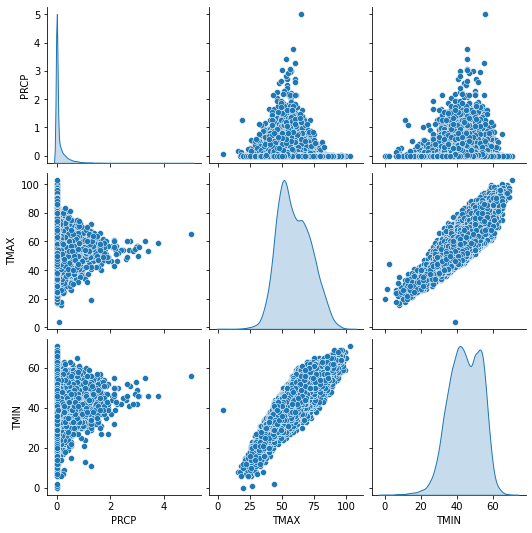

In [ ]:
sns.pairplot(data1[["PRCP", "TMAX", "TMIN"]], diag_kind="kde")

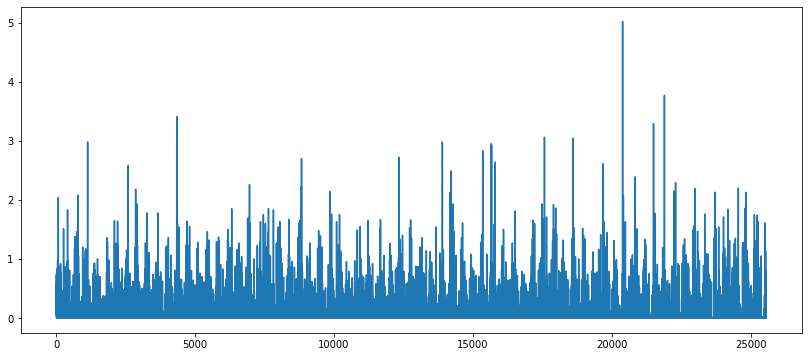

In [ ]:
plt.figure(figsize=(14,6))
data1['PRCP'].plot()

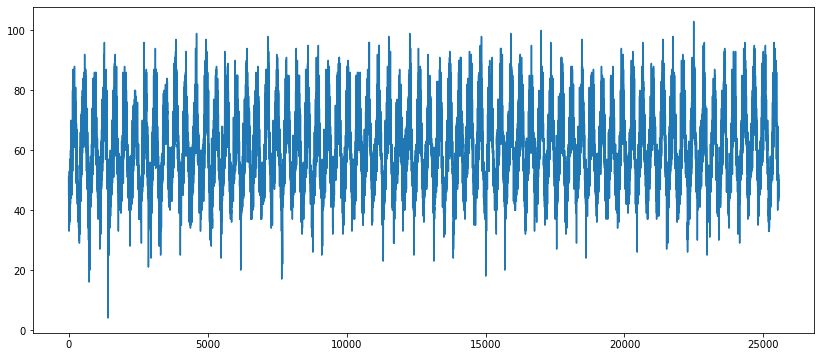

In [ ]:
plt.figure(figsize=(14,6))
data1['TMAX'].plot()

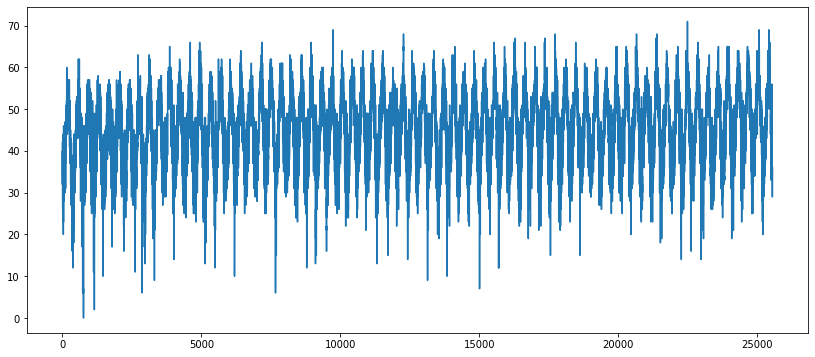

In [ ]:
plt.figure(figsize=(14,6))
data1['TMIN'].plot()

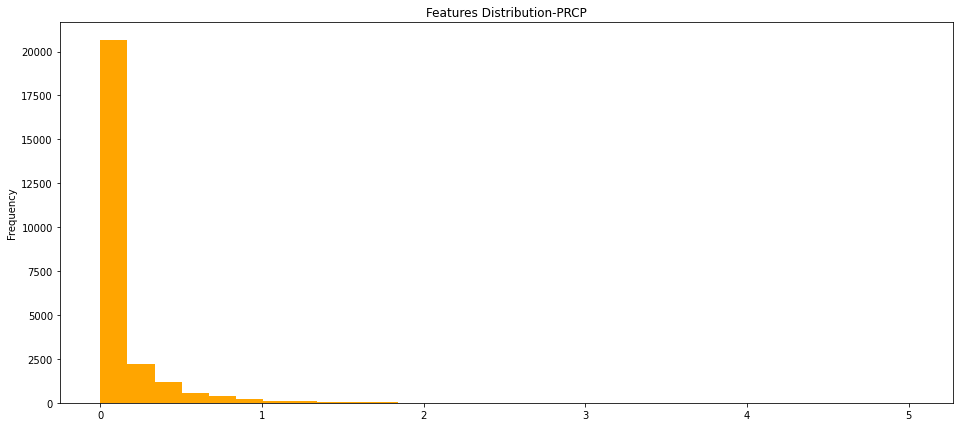

In [ ]:
data1['PRCP'].plot(kind='hist',bins=30,color='orange',figsize= (16,7))
plt.title("Features Distribution-PRCP")
plt.show()

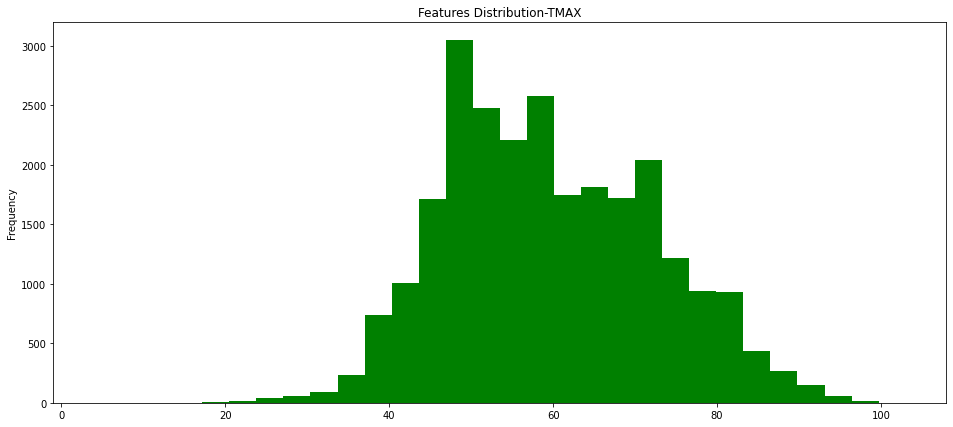

In [ ]:
data1['TMAX'].plot(kind='hist',bins=30,color='GREEN',figsize= (16,7))
plt.title("Features Distribution-TMAX")
plt.show()

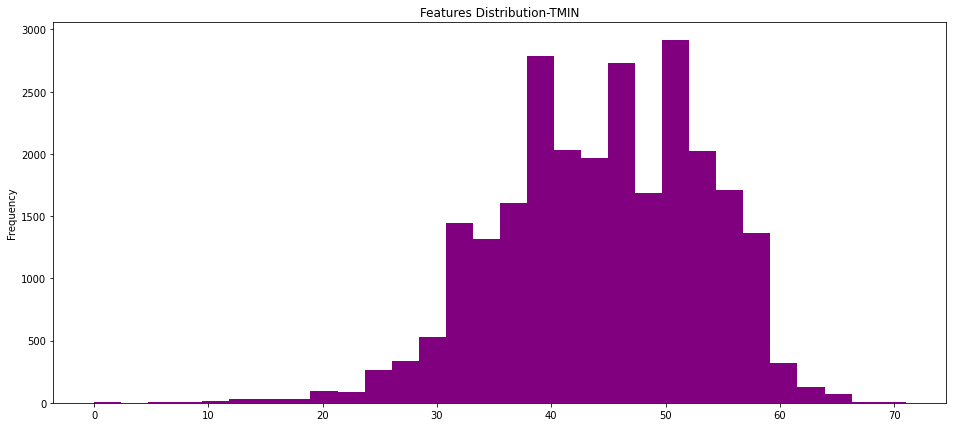

In [ ]:
data1['TMIN'].plot(kind='hist',bins=30,color='PURPLE',figsize= (16,7))
plt.title("Features Distribution-TMIN")
plt.show()

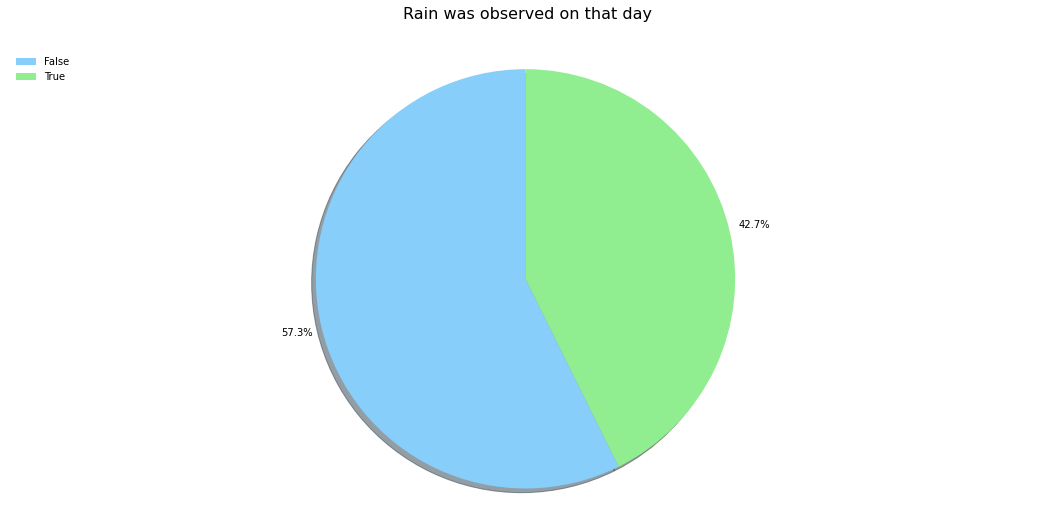

In [ ]:
colors_list = [ 'lightskyblue', 'lightgreen']
explode_list = [0, 0]

plt.subplot(1,1,1)
data1['RAIN'].value_counts().plot(kind='pie', figsize=[15, 7.5], autopct='%1.1f%%', 
                                       startangle=90, shadow=True, labels=None, pctdistance=1.12, colors=colors_list, explode=explode_list)
plt.title('Rain was observed on that day', y=1.05, size = 16)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels = data1['RAIN'].value_counts().index, loc = 'upper left', frameon=False)
plt.tight_layout(pad=2.0)
plt.show()

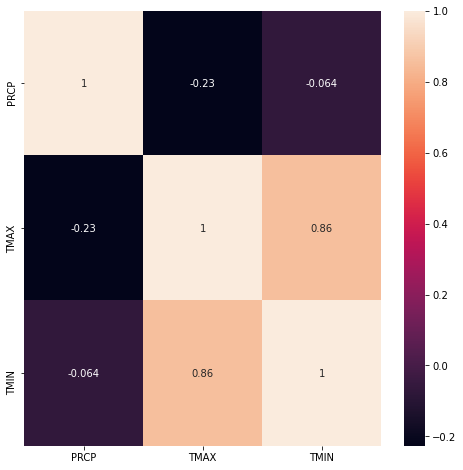

In [ ]:
#Heatmap for correlation between variables
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.heatmap(data1.corr(),annot=True)

**Observation:-** 
TMIN and TMAX are highly positively correlated to each other as observed from above correlation matrix.

**Let's convert <u>"RAIN"</u> column to numeric for ann**

In [ ]:
data1['rain']=[1 if i==True else 0 for i in data1['RAIN']]

In [ ]:
data1.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN', 'rain'], dtype='object')

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25548 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25548 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25548 non-null  int64  
 3   TMIN    25548 non-null  int64  
 4   RAIN    25548 non-null  object 
 5   rain    25548 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.4+ MB


In [ ]:
data1.dropna(inplace=True)

**Preparing Train and Test dataset**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data1[['PRCP', 'TMAX', 'TMIN']]
y=data1[['rain']]

In [ ]:
X

,PRCP,TMAX,TMIN
0,0.47,51,42
1,0.59,45,36
2,0.42,45,35
3,0.31,45,34
4,0.17,45,32
...,...,...,...
25546,0.00,49,34
25547,0.00,49,29
25548,0.00,46,32
25549,0.00,48,34


In [ ]:
# train and test split 80:20
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42,shuffle=True)

In [ ]:
print(X_train.count())
print(X_test.count())
print(y_train.count())
print(y_test.count())

PRCP    20438
TMAX    20438
TMIN    20438
dtype: int64
PRCP    5110
TMAX    5110
TMIN    5110
dtype: int64
rain    20438
dtype: int64
rain    5110
dtype: int64


In [ ]:
X.head()

,PRCP,TMAX,TMIN
0,0.47,51,42
1,0.59,45,36
2,0.42,45,35
3,0.31,45,34
4,0.17,45,32


In [ ]:
y.head()

,rain
0,1
1,1
2,1
3,1
4,1


<a id='section4'></a>
## 4. Creation of **ANN** model ###

### **Intriduction of ANN** ###

Artificial neural networks (ANNs) are biologically inspired computer programs designed to simulate the way in which the human brain processes information.

ANNs gather their knowledge by detecting the patterns and relationships in data and learn (or are trained) through experience, not from programming. 

The various applications of ANNs can be summarised into classification or pattern recognition, prediction and modeling.


 </center>
 <img src="https://github.com/jmps967/INSAID-DLF_Jigna-Thacker/blob/master/Image/Introduction-to-Artificial-Neural-Networks.jpg?raw=true" width="720" height="360" /> 
 </center>


__Installation & Importing Packages for ANN__ 

In [ ]:
# To use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-wl0pt29m
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-wl0pt29m
     |████████████████████████████████| 1.0MB 6.3MB/s 
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.04961914175b6837d95ca793f3541bdfe7420033f_-cp36-none-any.whl size=146358 sha256=889548a28640b84742e59d2955fae41000d13fbb4b2d499a9b7d140c48d94c77
  Stored in directory: /tmp/pip-ephem-wheel-cache-9z23f0zy/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


In [ ]:
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.4.0


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
pip install --upgrade keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.3)


#### **Preparing ANN-Sequntial Model** ####

In [ ]:
model  = Sequential()
model.add(Dense(units= 16,kernel_initializer= 'uniform', activation = 'relu', input_dim=3))
model.add(Dense(units= 16,kernel_initializer= 'uniform', activation = 'relu'))
model.add(Dense(units= 1,kernel_initializer= 'uniform', activation = 'sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#### **Let's see Summary** ####

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


#### **Model fitting** ####

In [ ]:
history=model.fit(X_train,y_train, batch_size=100, epochs=20,verbose= 1)

Epoch 1/20
205/205 [==============================] - 1s 1ms/step - loss: 0.6754 - accuracy: 0.5726
Epoch 2/20
205/205 [==============================] - 0s 1ms/step - loss: 0.5626 - accuracy: 0.6997
Epoch 3/20
205/205 [==============================] - 0s 1ms/step - loss: 0.4580 - accuracy: 0.7812
Epoch 4/20
205/205 [==============================] - 0s 1ms/step - loss: 0.4345 - accuracy: 0.7963
Epoch 5/20
205/205 [==============================] - 0s 1ms/step - loss: 0.4002 - accuracy: 0.8152
Epoch 6/20
205/205 [==============================] - 0s 1ms/step - loss: 0.3763 - accuracy: 0.8259
Epoch 7/20
205/205 [==============================] - 0s 1ms/step - loss: 0.3540 - accuracy: 0.8389
Epoch 8/20
205/205 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8516
Epoch 9/20
205/205 [==============================] - 0s 1ms/step - loss: 0.3096 - accuracy: 0.8634
Epoch 10/20
205/205 [==============================] - 0s 1ms/step - loss: 0.2908 - accuracy: 0.8716

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,epoch
15,0.194196,0.928271,15
16,0.183122,0.933653,16
17,0.166688,0.941041,17
18,0.154635,0.945885,18
19,0.152637,0.947793,19


In [ ]:
model.evaluate(X_test,y_test)

160/160 [==============================] - 0s 914us/step - loss: 0.1364 - accuracy: 0.9577


[0.13643890619277954, 0.9577299356460571]

In [ ]:
Y_pred = model.predict(X_test)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]
print(Y_pred)

[1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[2952    1]
 [ 215 1942]]


In [ ]:
# checking counts for prediction:

Rain_False_pred=Y_pred.count(0)
Rain_True_pred=Y_pred.count(1)

print(Rain_False_pred)
print(Rain_True_pred)

3167
1943


#### **Saving of model for future usage** ####

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


<a id='section5'></a>
## **5. Conclusion :-** ##

<font color='Red'> 
###<center> **Great Model** <center>  </font> ###

<center> <img src="https://github.com/jmps967/INSAID-DLF_Jigna-Thacker/blob/master/Image/tenor.gif?raw=true" width="520" height="320" /></center>



- After having multiple iteration wrt epoch, batchsize, changing loss    function , unit size etc. finally best model is generated with below **specifications**:

  - Units : 16,16,1
  - Kernel_initializer: uniform 
  - Activation : relu
  - Final activation : sigmoid 
  - Input_dim : 3
  - Optimizer : adam
  - Loss function : binary_crossentropy
  - Metrics : accuracy
  - Epochs : 20
  - Batch size : 100


- Model is executed very well. While executing model it is giving **95.77%** accuracy. However here we have to keep a note on sample size - **25548** is generally very low sample to perform ANN.

**Cross validation:-**

- While applying same model with normalisation and standard scaler accuracy is reaching **99.99%**, technically overfitted model. However data is relatively very clean and overall sample is small for ANN model building. This could be one of the reason for very good accuracy.

-When I tried to perform validation by applying Machine Learning Model Building using Pycaret - most of the algorithm is giving very high accuracy > **90%**. 

When things are pretty manageable with normal ML algorithm why to go with ANN? 
<font color='Red'> *Something worth thinking! 😊* </font>



<font color='Green'> 
#<center> **Thank You** <center>  </font>



<center> <img src="https://github.com/jmps967/INSAID-DLF_Jigna-Thacker/blob/master/Image/Thank%20you.jpg?raw=true" width="720" height="320" /></center>
